In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hour.csv')
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15474,15475,2012-10-11,4,1,10,23,0,4,1,1,0.42,0.4242,0.58,0.0896,10,176,186
8309,8310,2011-12-17,4,0,12,21,0,6,0,1,0.20,0.2121,0.75,0.1642,8,88,96
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.00,0.2537,0,2,2
9864,9865,2012-02-21,1,1,2,0,0,2,1,1,0.26,0.3030,0.65,0.0000,1,11,12
8785,8786,2012-01-06,1,1,1,21,0,5,1,1,0.40,0.4091,0.43,0.2239,17,137,154
3091,3092,2011-05-13,2,0,5,17,0,5,1,3,0.52,0.5000,0.88,0.1642,62,429,491
14039,14040,2012-08-13,3,1,8,4,0,1,1,1,0.64,0.6061,0.69,0.1045,0,11,11
5726,5727,2011-09-01,3,0,9,1,0,4,1,1,0.60,0.5909,0.73,0.0896,7,14,21
2863,2864,2011-05-04,2,0,5,5,0,3,1,3,0.36,0.3333,0.87,0.3284,1,8,9
10181,10182,2012-03-05,1,1,3,7,0,1,1,1,0.18,0.1970,0.59,0.1343,7,253,260


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
df.drop(columns=['instant','dteday'],inplace=True)

In [7]:
df.apply(lambda x: len(x.unique()))

,0
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,50
atemp,65


In [8]:
df.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


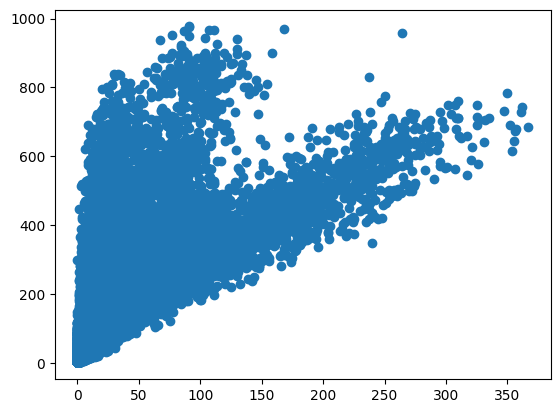

In [31]:
plt.scatter(df['casual'],df['cnt'])

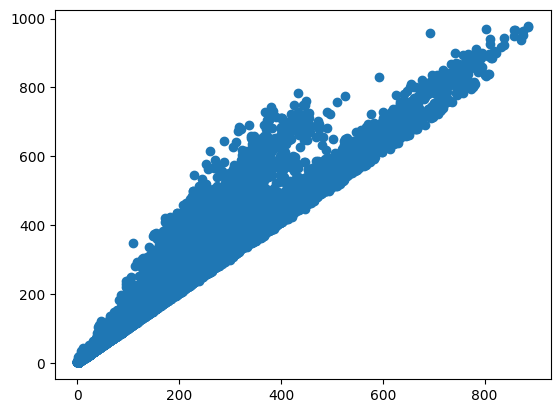

In [32]:
plt.scatter(df['registered'],df['cnt'])

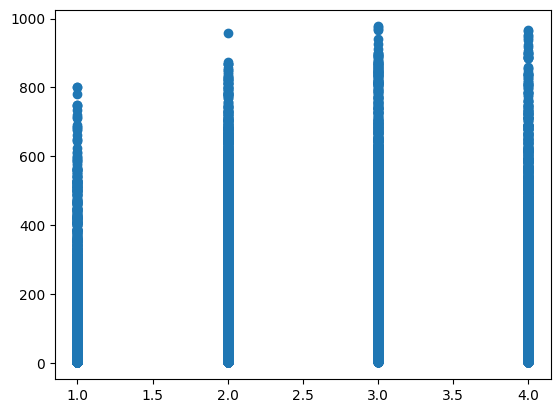

In [33]:
plt.scatter(df['season'],df['cnt'])

In [9]:
df.drop(columns=['weathersit','temp','atemp','hum','windspeed'],inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X,y = df.drop('cnt',axis=1),df['cnt']

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [11]:
X_scaled[1] , y[1]

(array([-1.3566343 , -1.0051343 , -1.61043792, -1.52537422, -0.1721122 ,
         1.49389084, -1.46689994, -0.56134262, -0.80465484]),
 40)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

## Linear Regression

In [14]:
le = LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = le.predict(X_test)
print(f'''r2 score : {r2_score(y_test,y_pred)}
mse : {mean_squared_error(y_test,y_pred)}
''')

r2 score : 1.0
mse : 1.1371664726329621e-30



## Random Forest Regressor

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
y_pred = rf.predict(X_test)
print(f'''r2 score : {r2_score(y_test,y_pred)}
mse : {mean_squared_error(y_test,y_pred)}
''')


r2 score : 0.9997511693127646
mse : 0.00023949633870561814



In [18]:
y_pred = le.predict(X_test)

In [19]:
le.score(X_test,y_test)

1.0

In [86]:
y_val_pred = le.predict(X_val)
print(r2_score(y_val,y_val_pred))
print(mean_squared_error(y_val,y_val_pred))

1.0
1.1272742709441196e-30


In [21]:
import pickle
pickle.dump(le,open('model.pkl','wb'))

In [22]:
model = pickle.load(open('model.pkl','rb'))

In [23]:
model.fit(X,y)

LinearRegression()

In [46]:
le.coef_,le.intercept_

(array([[-3.25628406e-16,  5.55111512e-17, -2.22044605e-16,
          3.56810935e-16,  1.39211559e-16, -2.01661604e-17,
         -1.94722710e-16,  2.71821396e-01,  8.34441200e-01]]),
 array([-1.90819582e-17]))

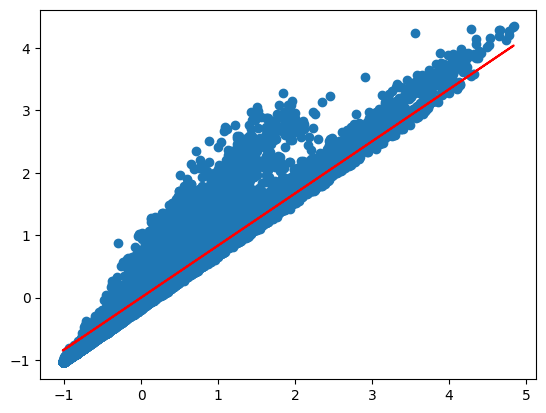

In [81]:
slope = le.coef_[0][-1]
intercept = le.intercept_
line = slope*X_scaled[:,-1]+intercept
plt.scatter(X_scaled[:,-1],y_scaled)
plt.plot(X_scaled[:,-1],line,color='red')

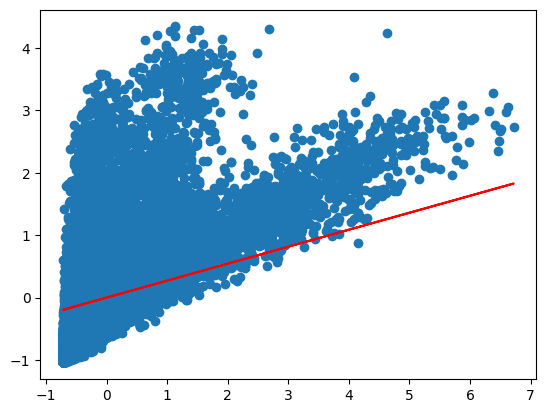

In [82]:
slope = le.coef_[0][-2]
intercept = le.intercept_
line = slope*X_scaled[:,-2]+intercept
plt.scatter(X_scaled[:,-2],y_scaled)
plt.plot(X_scaled[:,-2],line,color='red')

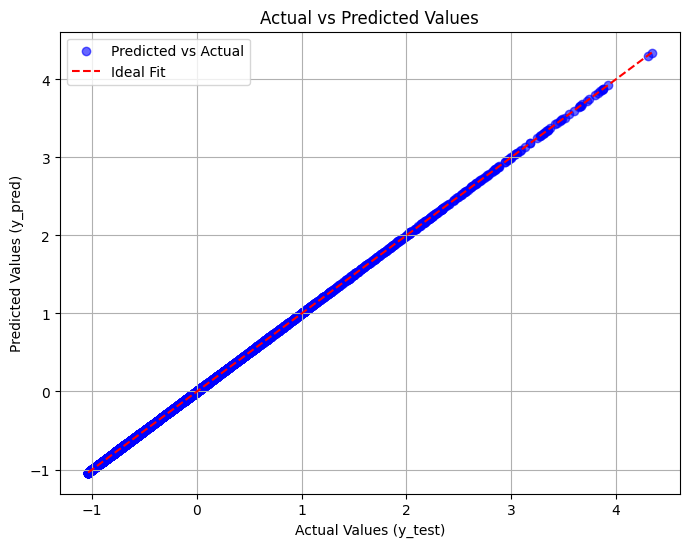

In [85]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are numpy arrays or lists
plt.figure(figsize=(8, 6))

# Scatter plot for visualization
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line to represent ideal predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

# Labeling
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
